### 1. Data Exploration and Preprocessing:

•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

•	Handle missing values as per the best practices (imputation, removal, etc.).

•	Apply scaling techniques to numerical features:

•	Standard Scaling

•	Min-Max Scaling

•	Discuss the scenarios where each scaling technique is preferred and why.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
file_path = r"D:\Assignments\EDA2\adult_with_headers.csv"
data = pd.read_csv(file_path)

# Data Exploration
print("Summary Statistics:\n", data.describe(include='all'))
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)

# Selecting numerical features for scaling
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Standard Scaling
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(numerical_features)
df_standard_scaled = pd.DataFrame(data_standard_scaled, columns=numerical_features.columns)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(numerical_features)
df_min_max_scaled = pd.DataFrame(data_min_max_scaled, columns=numerical_features.columns)

# Save results to CSV (optional)
df_standard_scaled.to_csv(r"D:\Assignments\EDA2\standard_scaled_data.csv", index=False)
df_min_max_scaled.to_csv(r"D:\Assignments\EDA2\min_max_scaled_data.csv", index=False)

# Display scaled data previews
print("\nStandard Scaled Data (First 5 Rows):\n", df_standard_scaled.head())
print("\nMin-Max Scaled Data (First 5 Rows):\n", df_min_max_scaled.head())


Summary Statistics:
                  age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital_status       occupation relationship    race    sex  \
count                 3256

### 2. Encoding Techniques:

•	Apply One-Hot Encoding to categorical variables with less than 5 categories.

•	Use Label Encoding for categorical variables with more than 5 categories.

•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [5]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
file_path = r"D:\Assignments\EDA2\adult_with_headers.csv"
data = pd.read_csv(file_path)

# Data Exploration (Categorical Features)
categorical_features = data.select_dtypes(include=['object'])

# Apply One-Hot Encoding to categorical variables with less than 5 categories
for column in categorical_features.columns:
    if len(categorical_features[column].unique()) < 5:
        # Apply One-Hot Encoding
        one_hot = pd.get_dummies(categorical_features[column], prefix=column)
        data = data.join(one_hot).drop(column, axis=1)

# Apply Label Encoding to categorical variables with more than 5 categories
label_encoder = LabelEncoder()
for column in categorical_features.columns:
    if len(categorical_features[column].unique()) >= 5:
        data[column] = label_encoder.fit_transform(categorical_features[column])

# Save the processed data to CSV (optional)
data.to_csv(r"D:\Assignments\EDA2\encoded_data.csv", index=False)

# Display the encoded data previews
print("\nEncoded Data (First 5 Rows):\n", data.head())



Encoded Data (First 5 Rows):
    age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country  sex_ Female  sex_ Male  income_ <=50

### 3. Feature Engineering:

•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Load the dataset
file_path = r"D:\Assignments\EDA2\adult_with_headers.csv"
data = pd.read_csv(file_path)

# 1. Create New Features

# Feature 1: 'Age Group' based on the 'age' column (categorizing people into 'Young', 'Middle-aged', 'Senior')
data['Age Group'] = pd.cut(data['age'], bins=[0, 25, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

# Feature 2: 'Income-to-Education Ratio' based on 'education-num' and 'capital-gain'
# This ratio indicates how much income a person generates for every year of education
data['Income-to-Education Ratio'] = data['capital_gain'] / (data['education_num'] + 1)  # Adding 1 to avoid division by 0

# Display new features preview
print("\nNew Features (First 5 Rows):\n", data[['age', 'Age Group', 'education_num', 'capital_gain', 'Income-to-Education Ratio']].head())

# 2. Apply Transformation to Skewed Numerical Feature

# Check the skewness of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])
skewed_features = numerical_features.skew()

# Apply log transformation to 'capital-gain' (assuming it's highly skewed)
data['capital_gain'] = np.log1p(data['capital_gain'])  # log1p handles zero values without error

# Check skewness again after transformation
skewed_features_after_transformation = data.select_dtypes(include=['int64', 'float64']).skew()
print("\nSkewness before and after transformation:\n", skewed_features, "\n", skewed_features_after_transformation)

# Save the processed data to CSV (optional)
#data.to_csv(r"D:\Assignments\EDA2\feature_engineered_data.csv", index=False)

# Display the transformed data preview
print("\nTransformed Data (First 5 Rows):\n", data[['age', 'capital_gain', 'Age Group', 'Income-to-Education Ratio']].head())



New Features (First 5 Rows):
    age    Age Group  education_num  capital_gain  Income-to-Education Ratio
0   39  Middle-aged             13          2174                 155.285714
1   50  Middle-aged             13             0                   0.000000
2   38  Middle-aged              9             0                   0.000000
3   53       Senior              7             0                   0.000000
4   28  Middle-aged             13             0                   0.000000

Skewness before and after transformation:
 age                           0.558743
fnlwgt                        1.446980
education_num                -0.311676
capital_gain                 11.953848
capital_loss                  4.594629
hours_per_week                0.227643
Income-to-Education Ratio    13.516677
dtype: float64 
 age                           0.558743
fnlwgt                        1.446980
education_num                -0.311676
capital_gain                  3.096144
capital_loss           


Mutual Information for Numeric Features:
                            Mutual Information
age                                  0.067866
fnlwgt                               0.032599
education_num                        0.066085
capital_gain                         0.085706
capital_loss                         0.035945
hours_per_week                       0.043045
income                               0.549740
Income-to-Education Ratio            0.074985


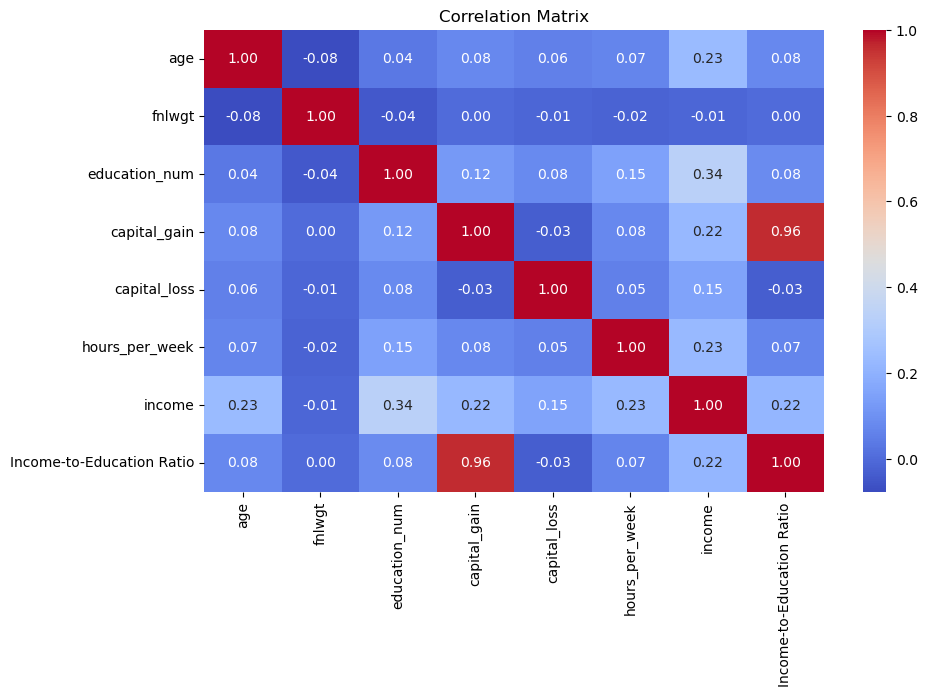


Correlation Matrix:
                                 age    fnlwgt  education_num  capital_gain  \
age                        1.000000 -0.076646       0.036527      0.077674   
fnlwgt                    -0.076646  1.000000      -0.043195      0.000432   
education_num              0.036527 -0.043195       1.000000      0.122630   
capital_gain               0.077674  0.000432       0.122630      1.000000   
capital_loss               0.057775 -0.010252       0.079923     -0.031615   
hours_per_week             0.068756 -0.018768       0.148123      0.078409   
income                     0.234037 -0.009463       0.335154      0.223329   
Income-to-Education Ratio  0.076276  0.001496       0.083823      0.959606   

                           capital_loss  hours_per_week    income  \
age                            0.057775        0.068756  0.234037   
fnlwgt                        -0.010252       -0.018768 -0.009463   
education_num                  0.079923        0.148123  0.335154   

In [17]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'income'
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

# Select numerical features and the target column ('income')
numeric_data = data.select_dtypes(include=['int64', 'float64'])
target_column = 'income'

# Mutual information for regression (numerical data)
mutual_info = mutual_info_regression(numeric_data, data[target_column])  # Using the correct target variable 'income'

# Convert mutual information to a DataFrame for easier viewing
mutual_info_df = pd.DataFrame(mutual_info, index=numeric_data.columns, columns=['Mutual Information'])
print("\nMutual Information for Numeric Features:\n", mutual_info_df)

# Correlation matrix (for numerical features)
correlation_matrix = numeric_data.corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Comparing mutual information and correlation
print("\nCorrelation Matrix:\n", correlation_matrix)
